<a href="https://colab.research.google.com/github/vishnoor/Course/blob/master/Upgrad_MLR_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


###Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


##Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

 
<code>
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
</code>

where **y_test** is the test data set for the target variable, and **y_pred** is the variable containing the predicted values of the target variable on the test set.

Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

In [261]:
import warnings
warnings.filterwarnings ('ignore')

#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [262]:
#read in our CSV
df = pd.read_csv("day.csv")

###Basic EDA on the data to cleanse the same

In [263]:
#shape of our data
df.shape

(730, 16)

In [264]:
#Check our column types and see if any null values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [265]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Our dataset has 760 rows and 16 columns . Except the dteday column all other colums are float or int types

### Data Preprocessing for Quality 

In [266]:
#column wise null percentage
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [267]:
#null count percentage by row
round((df.isnull().sum(axis=1)/len(df))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

#### Check for Duplicate rows

In [268]:
df_clone = df.copy()
df_clone.drop_duplicates(subset=None, inplace=True)

df_clone.shape


(730, 16)

In [269]:

df.shape

(730, 16)

Since the shape of both the DataFrames is the same, we can conclude that there were no duplicates

### Drop Identity Columns
The instant column is like a unique identifier of the row and has no value. We will drop this column

In [270]:
df = df.drop(['instant'], axis = 1)

Next we see what unique values are there in each column to identify if any anomolous values are present

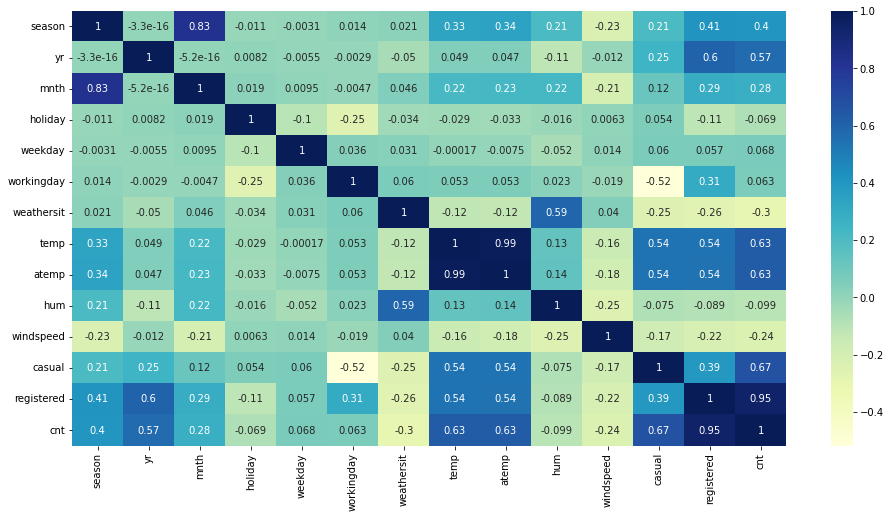

In [271]:
#Try to determine correlation between variables
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### **Data Analysis**
 We see that our dataset has 730 rows and 16 columns. None of the columns have any null values. All columns except the dteday column are of propert type.

#### **Column Analysis**
1. **instant**
 
 This is just a record identifier. Not of significance. Dropped

2. **dteday**

 The dteday column is represented by other columns such as yr,mnth. The important aspect of the date is captured by the holiday,weekday,workingday combination. So we can discard the dteday column.

3. **season**

 This is a categorical nominal column. Need Dummy Labelling

4. **year**

 The fact that 2018 = 0 and 2019 = 1 means that the data has already converted absolute times to relative times. So we will retain it as is.

5. **mnth**

 This too will be retained as is as it is sort of Label Encoded. Though month by itself does not have any meaning, its combination with the year column gives a combined meaning.

6. **holiday**

 Will retain as is as it sort of is a OHE representation of an attribute of the data - WorkDayClass - Holiday|Weekend|Working Day

7. **weekday**
 This represents the day of the week. We assume 0 to be Sunday and 7 to Saturday. This will have high correlation with Weekend|Working Day

8. **weathersit**

 Though a weather situation appears to be nominal, in case of renting cycles, the weather actually plays an infuence. Further analysis needed.

9. **temperature**
  Celcius. Will be dropped as the actual temprature is what humans react to. This should show multicolinearity with atemp

10. **atemp**
 
 The actual temprature felt. This will be considered for analysis

11. **hum**

  Will analyse for multicolinearity with atemp

12. **windspeed**

 Will analyse for multicolinearity with atemp

13. **casual**
  
  No of casual users. This is part of cnt. Will Drop

14. **regstered**

  No of registered users. This is part of cnt. Will Drop

15. **cnt**

  Total number of users. This is our target variable.

In [272]:
df_clean = df[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

df_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables & Conversion

Some Categorical variables are appearing as Ordinal variables.. These are

- season
- yr
- mnth
- workingday
- weathersit

In [273]:
#convert identified variables above to Categorical variables
df_clean['season']=df_clean['season'].astype('category')
df_clean['yr']=df_clean['yr'].astype('category')
df_clean['weathersit']=df_clean['weathersit'].astype('category')
df_clean['mnth']=df_clean['mnth'].astype('category')
df_clean['weekday']=df_clean['weekday'].astype('category')

In [274]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(5), float64(4), int64(3)
memory usage: 44.8 KB


In [275]:
#Now we will create the dummy variable for all the categorical columns. We will drop the first column for each dummy
df_clean = pd.get_dummies(df_clean, drop_first=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   holiday       730 non-null    int64  
 1   workingday    730 non-null    int64  
 2   temp          730 non-null    float64
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  yr_1          730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

We will now split the data

In [276]:
### Trains Test Split
np.random.seed(0)
df_train, df_test = train_test_split(df_clean, train_size = 0.70, test_size = 0.30, random_state = 256)


In [277]:
df_train.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_2', 'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

### Numerical Variables

Plot the columns that are numerical in type. Derived Dummy columns are not to be plotted

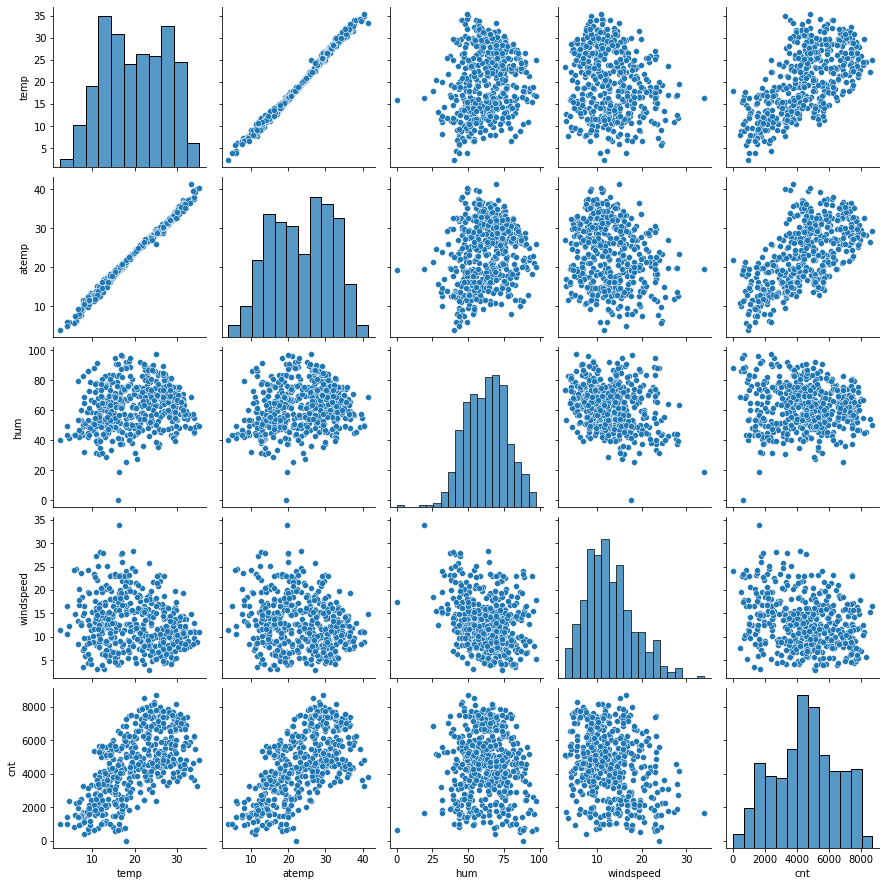

In [278]:
df_numeric = df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_numeric)
plt.show()

From the above we can see that there is a very strong corelation between temperature and atemp.

Also the cnt has linear relationship with both temp and atemp. So we can attempt to fit a MLR on this dataset

### Categorical Variables

We plot a box plot from the original dataset to see the effects of the various categorical variables
- season
- mnth
- weathersit
- holiday
- weekday
- workingday

Even though year was identified as a categorical variable as it has only two values, 0 & 1 - it is being treated as a binary. So analysis of year is not being done.

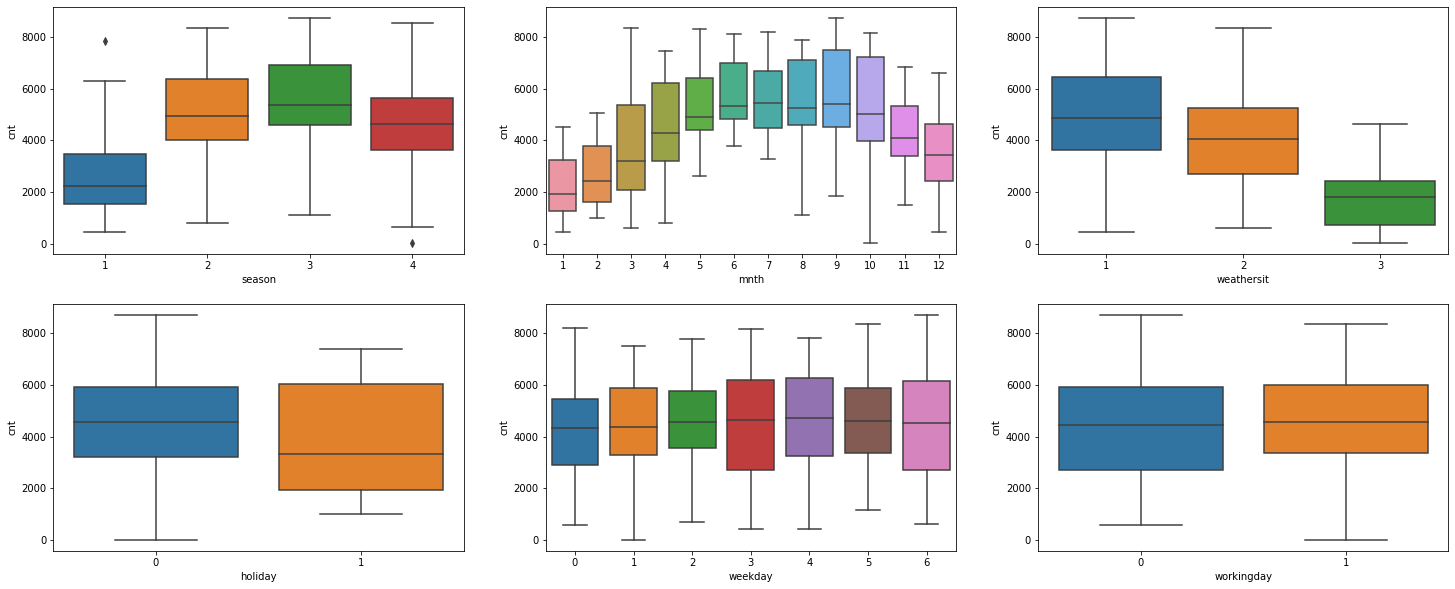

In [279]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

From the above we see that 
1. Season-3 has significant contribution towards the count. Season would be a good feature
2. Month too shows a trend with month 4 - month 10 contributing towards the cnt.
3. weather situation has a negative effect on the cnt
4. The holiday does not seem to affect the outcome.
5. Weekdays too seems not to affect the target
6. working day has some significane on the outcome

### Correlation Matrix

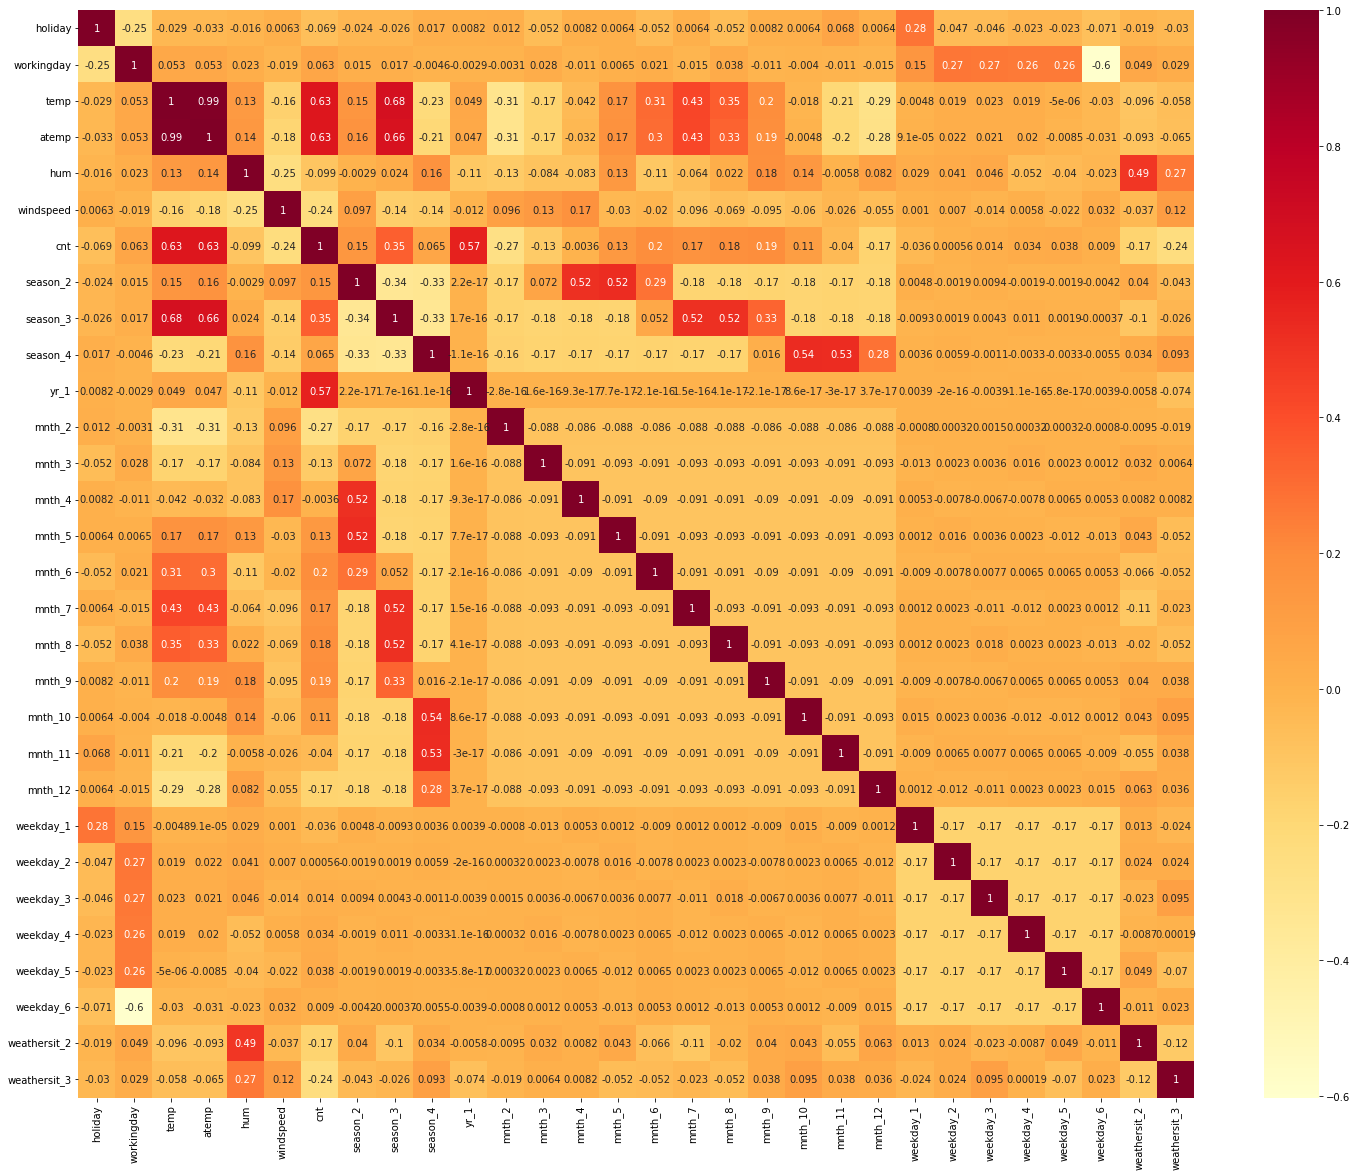

In [280]:
plt.figure(figsize = (25,20))
sns.heatmap(df_clean.corr(), annot = True, cmap="YlOrRd")
plt.show()

### Rescaling

In [281]:
scaler = MinMaxScaler()

# Apply scaler() to all the numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [282]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE

To get a quick intution of the columns we would look at using sklearn RFE

In [283]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [284]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', False, 2),
 ('workingday', False, 2),
 ('temp', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 2),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 2),
 ('mnth_12', False, 2),
 ('weekday_1', False, 2),
 ('weekday_2', False, 2),
 ('weekday_3', False, 2),
 ('weekday_4', False, 2),
 ('weekday_5', False, 2),
 ('weekday_6', True, 1),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [285]:
cols_to_consider = X_train.columns[rfe.support_]
cols_to_consider

Index(['atemp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_3', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'weekday_6',
       'weathersit_3'],
      dtype='object')

### STATSMODEL Bulding
Now that we have the list of columns the RFE suggested we can build our model in a forward stepping process



In [286]:
def print_vif(test_df):
  vif = pd.DataFrame()
  vif['Features'] = test_df.columns
  vif['VIF'] = [variance_inflation_factor(test_df.values, i) for i in range(test_df.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  print(vif)

In [287]:
X_train_rfe = X_train[cols_to_consider]

#### Model - 1

In [288]:
# Add a constant
X_train_lm_1 = sm.add_constant(X_train_rfe)

# Create the first
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

print_vif(X_train_rfe)
print(lr_1.summary())

        Features    VIF
0          atemp  24.34
1            hum  11.89
4       season_3   7.18
3       season_2   3.92
2      windspeed   3.79
5       season_4   2.88
6           yr_1   2.05
8         mnth_5   2.02
10        mnth_8   1.80
9         mnth_6   1.63
11        mnth_9   1.43
7         mnth_3   1.27
12     weekday_6   1.19
13  weathersit_3   1.14
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     175.6
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          1.16e-181
Time:                        23:56:54   Log-Likelihood:                 493.97
No. Observations:                 510   AIC:                            -957.9
Df Residuals:                     495   BIC:                            -894.4
Df Model

### Model -2 

Due to high VIF of season_3 we will drop that 

In [289]:
X_train_rfe = X_train_rfe.drop(['season_3'], axis = 1)

In [290]:
# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe)
# Create the 2ns
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

print_vif(X_train_rfe)
print(lr_2.summary())

        Features    VIF
1            hum  11.38
0          atemp  11.03
2      windspeed   3.71
3       season_2   2.61
5           yr_1   2.04
7         mnth_5   1.96
4       season_4   1.86
9         mnth_8   1.63
8         mnth_6   1.60
10        mnth_9   1.34
6         mnth_3   1.21
11     weekday_6   1.19
12  weathersit_3   1.13
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          5.51e-180
Time:                        23:56:54   Log-Likelihood:                 487.25
No. Observations:                 510   AIC:                            -946.5
Df Residuals:                     496   BIC:                            -887.2
Df Model:                       

### Model 3
 Dropping hum due to high VIF

In [291]:
X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)

# Add a constant
X_train_lm_3 = sm.add_constant(X_train_rfe)
# Create the 2ns
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()

print_vif(X_train_rfe)
print(lr_3.summary())



        Features   VIF
0          atemp  6.21
1      windspeed  3.22
2       season_2  2.60
4           yr_1  2.03
6         mnth_5  1.95
8         mnth_8  1.62
7         mnth_6  1.57
3       season_4  1.56
9         mnth_9  1.34
5         mnth_3  1.19
10     weekday_6  1.18
11  weathersit_3  1.09
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          8.74e-169
Time:                        23:56:54   Log-Likelihood:                 457.92
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     497   BIC:                            -834.8
Df Model:                          12                                

### Model - 4
Dropping mnth_5 due to high p-value

In [292]:
X_train_rfe = X_train_rfe.drop(['mnth_5'], axis = 1)

# Add a constant
X_train_lm_4 = sm.add_constant(X_train_rfe)
# Create the 2ns
lr_4 = sm.OLS(y_train, X_train_lm_4).fit()

print_vif(X_train_rfe)
print(lr_4.summary())

        Features   VIF
0          atemp  5.73
1      windspeed  3.14
4           yr_1  2.02
2       season_2  1.86
7         mnth_8  1.58
3       season_4  1.54
6         mnth_6  1.34
8         mnth_9  1.32
9      weekday_6  1.18
5         mnth_3  1.16
10  weathersit_3  1.09
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     189.0
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          7.73e-170
Time:                        23:56:54   Log-Likelihood:                 457.69
No. Observations:                 510   AIC:                            -891.4
Df Residuals:                     498   BIC:                            -840.6
Df Model:                          11                                         
Covariance Ty

### Model-5

Drop month 6 due to high p value ( > 0.05)

In [293]:
X_train_rfe = X_train_rfe.drop(['mnth_6'], axis = 1)

# Add a constant
X_train_lm_5 = sm.add_constant(X_train_rfe)
# Create the 2ns
lr_5 = sm.OLS(y_train, X_train_lm_5).fit()

print_vif(X_train_rfe)
print(lr_5.summary())

       Features   VIF
0         atemp  5.04
1     windspeed  3.09
4          yr_1  2.02
2      season_2  1.84
3      season_4  1.51
6        mnth_8  1.50
7        mnth_9  1.28
8     weekday_6  1.18
5        mnth_3  1.14
9  weathersit_3  1.09
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     208.0
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          7.24e-171
Time:                        23:56:55   Log-Likelihood:                 457.36
No. Observations:                 510   AIC:                            -892.7
Df Residuals:                     499   BIC:                            -846.1
Df Model:                          10                                         
Covariance Type:            nonrobust          

### Model-6
Removing month 3 for high p value (> 0.05)

In [294]:
X_train_rfe = X_train_rfe.drop(['mnth_3'], axis = 1)

# Add a constant
X_train_lm_6 = sm.add_constant(X_train_rfe)
# Create the 2ns
lr_6 = sm.OLS(y_train, X_train_lm_6).fit()

print_vif(X_train_rfe)
print(lr_6.summary())

       Features   VIF
0         atemp  5.04
1     windspeed  2.95
4          yr_1  2.01
2      season_2  1.84
5        mnth_8  1.50
3      season_4  1.48
6        mnth_9  1.28
7     weekday_6  1.18
8  weathersit_3  1.09
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     229.7
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          2.47e-171
Time:                        23:56:55   Log-Likelihood:                 455.64
No. Observations:                 510   AIC:                            -891.3
Df Residuals:                     500   BIC:                            -848.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                

### Conclusion

We see that the best R-squared value of 0.805 has been achived with significant p-values for the constants. Also there is low multicolinearity amongst the variables.

The p(F-Statistic) is also very low

In [295]:
lr_6.params

const           0.067764
atemp           0.572980
windspeed      -0.101952
season_2        0.090032
season_4        0.124517
yr_1            0.233285
mnth_8          0.052016
mnth_9          0.086184
weekday_6       0.034592
weathersit_3   -0.230677
dtype: float64

In Model-6 none of our co-efficients are zero. 

The equation comes to 

cnt = 0.067764 + (0.572980 * **atemp**) - (0.101952 * **windspeed**) + (0.090032 * **season_2**) + (0.124517 * **season_4**) + (0.233285 * **yr_1**) + (0.052016 * **mnth_8**) + (0.86184 * **mnth_9**) + (0.034592 * **weekday6**) - (0.230677 * **weathersit_3**)

### Regression Validation / Residual Analysis

1. Error terms are normally distributed with mean zero 

In [296]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

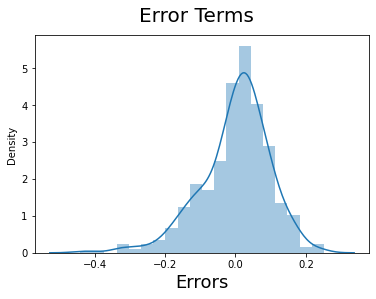

In [297]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

2. linear relationship between X and Y

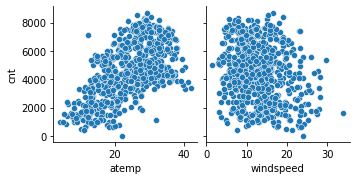

In [298]:
m6_cols = ['atemp','windspeed']
sns.pairplot(df_clean, x_vars= m6_cols, y_vars = ['cnt'])
plt.show()

### Final Model Predictions


In [299]:
cols_for_pred = ['atemp', 'windspeed', 'season_2', 'season_4', 'yr_1', 'mnth_8', 'mnth_9', 'weekday_6', 'weathersit_3']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [300]:
y_test = df_test.pop('cnt')
X_test = df_test


In [305]:
#Selecting the variables that were part of final model.
cols_for_pred = ['atemp', 'windspeed', 'season_2', 'season_4', 'yr_1', 'mnth_8','mnth_9', 'weekday_6', 'weathersit_3']

X_test = X_test[cols_for_pred]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [307]:
y_test_pred = lr_6.predict(X_test_lm_6)

Text(0, 0.5, 'y_pred')

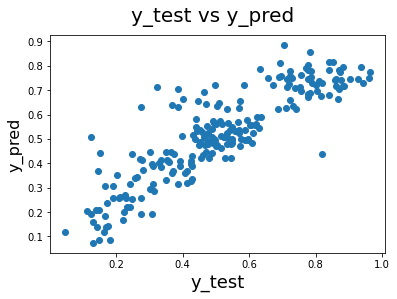

In [308]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

### R-square value

In [313]:
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test, y_test_pred)

print(test_r2)

0.7549595438972525


### Adjusted R-squared value



In [315]:
#n = number of rows
n = X_test.shape[0]

# Number of features
p = X_test.shape[1]

adjusted_r2 = 1-(1- test_r2)*(n-1)/(n-p-1)

print(adjusted_r2)

0.7444075625339763
